In [1]:
import cv2
import matplotlib.pyplot as plt
import PIL
import numpy as np
import colorsys
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [9]:
img = cv2.imread("../dataset/data_tes/IMG_9884.png")
img = cv2.resize(img, (300,200))
cv2.imshow("Gambar Asli", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

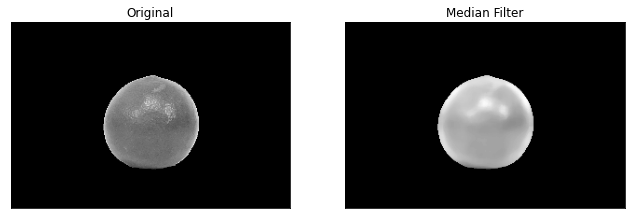

In [10]:
#Median Filter
#diubah ke grayscale terlebih dahulu 
image2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
figure_size = 9
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
grayscaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, grayscaled = cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(grayscaled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

img_copy = img.copy()
cv2.drawContours(image=img_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

mask = np.ones(grayscaled.shape)
mask = cv2.drawContours(mask, contours, -1, 0, cv2.FILLED)
output = img.copy()
output[mask.astype(np.bool), :] = 0
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 0] = img[mask == 0]

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask2 = np.zeros(grayscaled.shape, np.uint8)
cv2.drawContours(mask2, contours, -1, 255, -1)
mean = cv2.mean(img, mask=mask2)[:3]
boolmask = np.bool_(mask2)
values = img[boolmask]

def hsv2rgb(h,s,v):
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))

# cv2_imshow(output)
img_copy = cv2.resize(img_copy,(300,200))
cv2.imshow("hasil",img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows
# cv2_imshow(np.uint8(255 * mask))
# cv2_imshow(out)

C:\Users\ACER\AppData\Local\Temp/ipykernel_8196/189725527.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  output[mask.astype(np.bool), :] = 0


<function destroyAllWindows>

In [12]:
print(mean) # in BGR
print(values) # in BGR

(84.18442069050252, 137.92333210468118, 126.41970758078389)
[[104 104 104]
 [179 215 215]
 [166 202 202]
 ...
 [ 22  22  22]
 [ 22  22  22]
 [ 32  32  32]]


In [13]:
titles = ["Red" , "Green", "Blue"]
#Read In the File
df = pd.read_csv("dataset.csv")
y = df["tingkatkematangan"].values
X = df.drop("tingkatkematangan", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
#Decision Tree Accuracy
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)
importances = estimator.feature_importances_
y_pred = estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
for index in range(len(importances)):
    print(titles[index] + ": " + str(importances[index]))
print('DecisionTree Classifier: {:.3f}\n'.format(accuracy))

Red: 0.6825806451612905
Green: 0.0
Blue: 0.31741935483870964
DecisionTree Classifier: 1.000



In [15]:
#Decision Tree Forests Accuracy
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, test_size=0.20,)
rf = RandomForestClassifier(n_estimators=35,random_state=2)
rf.fit(Xf_train, yf_train)
importancesf = rf.feature_importances_
y_predF = rf.predict(Xf_test) 
accuracyF = accuracy_score(yf_test, y_predF)
for index in range(len(importancesf)):
    print(titles[index] + ": " + str(importancesf[index]))

print('DecisionTreeForest Classifier: {:.3f}\n'.format(accuracyF))

Red: 0.5340790196350186
Green: 0.1620915563502366
Blue: 0.3038294240147448
DecisionTreeForest Classifier: 0.929



In [16]:
#K Nearest Neighbors Accuracy
Xk_train, Xk_test, yk_train, yk_test = train_test_split(X, y, stratify=y, test_size=0.20)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X,y)
print('Accuracy wih KNN: {:.3f}'.format(knn.score(Xk_test,yk_test)))

Accuracy wih KNN: 0.929


In [24]:
from sklearn import metrics
y_predF = rf.predict(Xf_test) 
conf = metrics.confusion_matrix(yf_test, y_predF)
conf

array([[5, 1],
       [0, 8]], dtype=int64)

In [32]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

Text(0.5, 15.0, 'Predicted label')

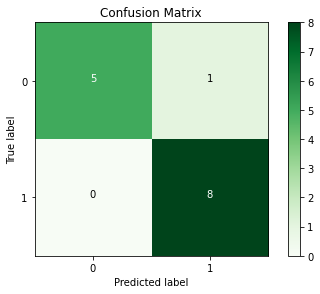

In [34]:
import itertools
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [36]:
# from the confusion matrix
TP = true_pos = 8
TN = true_neg = 5
FP = false_pos = 1
FN = false_neg = 0

In [37]:
results = {}

In [38]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.929
